In [1]:
import os

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from nbt import nbt
import numpy as np
import cv2

from misc import constants

In [2]:
SAVE_PATH = 'data/rgb_data'
os.makedirs(SAVE_PATH, exist_ok = True)

In [3]:
def gencolors(allcolors, basecolors, alphacolor):
    
    '''sets allcolors list and allcolorsinversemap to match basecolors,
    and updates all of them to match alphacolor'''
    basecolors[0] = alphacolor
    allcolors = []
    allcolorsinversemap = {}
    
    for i in range(len(basecolors)):
        r = round
        if i == 0:
                allcolors.extend([alphacolor]*4)
                allcolorsinversemap[alphacolor] = 3
        else:
            c = basecolors[i]
            for n in range(4):
                m = (180,220,255,135)[n]
                newcolor = (r(c[0]*m/255), r(c[1]*m/255), r(c[2]*m/255))
                
                allcolors.append(newcolor)
                allcolorsinversemap[newcolor] = i*4 + n
                
    return allcolors * 2

def read_data(data_path):
    
    file = nbt.NBTFile(data_path)
    return file['data']


def save_image(data_path, file_name, n = 1):
    
    image      = Image.new('RGB', (128, 128))
    draw       = ImageDraw.Draw(image)
    colordata  = read_data(data_path)['colors'].value
    
    allcolors  = constants.allcolors
    basecolors = constants.basecolors
    alphacolor = constants.alphacolor
    
    allcolors  = gencolors(allcolors, basecolors, alphacolor)
    rgbdata    = [allcolors[v] for v in colordata]
    image.putdata(rgbdata)
    
    image = image.resize((128 * n, 128 * n), Image.LANCZOS)
    image.save(file_name, 'JPEG', quality = 100, subsampling = 0)

In [4]:
for idx, file_path in enumerate(os.listdir('data/dat'), 1):
    
    if 'map' not in file_path: continue
    
    print(f'[{idx}] {file_path}')
    file_path = f'data/dat/{file_path}'
    save_name = f'{SAVE_PATH}/worlds_{str(idx).zfill(3)}.jpg'
    save_image(file_path, save_name, n = 2)

[1] map_1.dat
[2] map_2.dat
[3] map_3.dat
[4] map_4.dat
[5] map_5.dat
[6] map_8.dat
[7] map_6.dat
[8] map_7.dat
[9] map_9.dat
[10] map_10.dat
[11] map_11.dat
[12] map_12.dat
[13] map_13.dat
[14] map_14.dat
[15] map_15.dat
[16] map_16.dat
[17] map_17.dat
[18] map_18.dat
[19] map_19.dat
[20] map_20.dat
[21] map_21.dat
[22] map_22.dat
[23] map_24.dat
[24] map_23.dat
[25] map_25.dat
[26] map_26.dat
[27] map_27.dat
[28] map_28.dat
[29] map_29.dat
[30] map_30.dat
[31] map_31.dat
[32] map_32.dat
[33] map_33.dat
[34] map_34.dat
[35] map_35.dat
[36] map_36.dat
[37] map_37.dat
[38] map_39.dat
[39] map_38.dat
[40] map_40.dat
[41] map_41.dat
[42] map_42.dat
[43] map_43.dat
[44] map_44.dat
[45] map_45.dat
[46] map_46.dat
[47] map_47.dat
[48] map_48.dat
[49] map_49.dat
[50] map_50.dat
[51] map_51.dat
[52] map_52.dat
[53] map_53.dat
[54] map_54.dat
[55] map_55.dat
[56] map_56.dat
[57] map_57.dat
[58] map_58.dat
[59] map_59.dat
[60] map_60.dat
[61] map_61.dat
[62] map_62.dat
[63] map_63.dat
[64] map_6

True

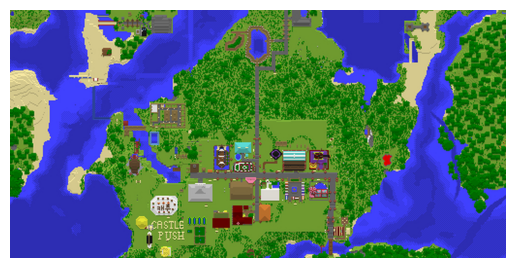

In [5]:
map1_1 = Image.open(f'{SAVE_PATH}/worlds_079.jpg')
map1_2 = Image.open(f'{SAVE_PATH}/worlds_081.jpg')
map1_3 = Image.open(f'{SAVE_PATH}/worlds_082.jpg')
map1_4 = Image.open(f'{SAVE_PATH}/worlds_083.jpg')

map2_1 = Image.open(f'{SAVE_PATH}/worlds_076.jpg')
map2_2 = Image.open(f'{SAVE_PATH}/worlds_077.jpg')
map2_3 = Image.open(f'{SAVE_PATH}/worlds_078.jpg')
map2_4 = Image.open(f'{SAVE_PATH}/worlds_093.jpg')

map_1 = np.hstack([map1_1, map1_2, map1_3, map1_4])
map_2 = np.hstack([map2_3, map2_2, map2_1, map2_4])
map_  = np.vstack([map_1, map_2])

plt.imshow(map_)
plt.axis(False)

map_ = cv2.cvtColor(map_, cv2.COLOR_BGR2RGB)
cv2.imwrite('data/map.jpg', map_)